**Tarea en clase (2 puntos)**

- Investigar sobre algún otro algoritmo no supervisado que pueda usarse en tu código. Da un panorama sobre el modelo matemático que emplea y explica por qué conviene aplicarlo a tus datos. Algunos modelos que no se vieron en clase son Affinity Propagation, BIRCH, DBSCAN, Mean Shift, Nearest Neighbors, OPTICS, Spectral Clustering, TSNE, entre otros.
- Investigar otras estrategias para determinar número de grupos en estos algoritmos (como los índices de Calinski-Harabasz o de Davies-Bouldin), elegir la más adecuada al método que elegiste

**Tarea (8 puntos)**

- Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes
- Elegir alguna métrica para determinar número de grupos, usarla y discutirla
- Busca alguna revista científica que publique trabajos relacionados con el tuyo
- Crea artículo mediante Latex con base en los lineamientos de la revista elegida y redacta ahí tus resultados, discusiones y bibliografía
- Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

-------------------------------------------------------------------------------------------------------------------------------

#### Abstract

Se tomó como inspiración el artículo *Exploring Spatiotemporal Pattern and Agglomeration
of Road CO2 Emissions in Guangdong, China* para realizar un modelo de aprendizaje no supervisado (DBSCAN) sobre los datos de emisiones de CO2 en vehículos en Cánada. 
Se realiza primeramente una reducción de dimensionaldiad para tener una visualización 2D de los datos, usando el algoritmo de T-SNE, esto con el fin de ver la densidad de colores (clusters) asignados por la clusterización obtenida del DBSCAN. 
Para fines de este ejercicio, el DBSCAN se efectúa sobre las variables numéricas de los datos.

Se hace la lectura de los datos

In [1]:
import pandas as pd

In [19]:
# lectura de datos
df = pd.read_csv('C:/Users/emanuel.novelo/Desktop/MCD - 2024-2026/ML - 2do Tetra/MCD----ML----2024/data/CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Descripción básica de la data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Selección de features numéricas para T-SNE y DBSCAN

In [20]:
# Numeric Features for clustering
# Seleccionar las columnas numéricas para clustering
features = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
                 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]

Dimensionality Reduction (T-SNE).
Se realiza una reducción de dimensionalidad a 2 componentes para visualizar las features en un espacio 2D. El algoritmo DBSCAN funciona particularmente bien para identificar densidad en los datos, por lo que la visualización 2D resulta apropiada. El T-SNE es una ténica de Aprendizaje No Supervisado de reducción de dimensiones ampliamente utilizada para la exploración de datos y la visualización de datos de altas dimesiones.

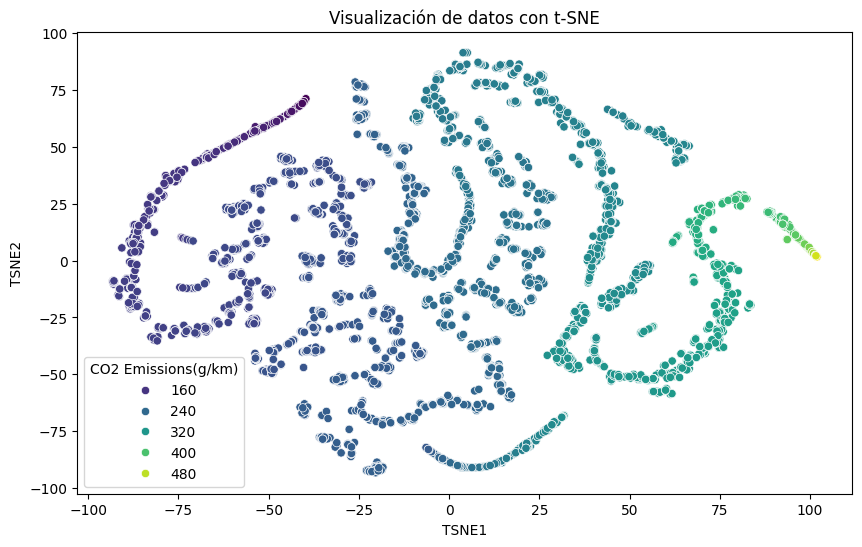

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Reducir las dimensiones a 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Crear un DataFrame con los resultados de t-SNE
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['CO2 Emissions(g/km)'] = df['CO2 Emissions(g/km)']

# Visualizar los datos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='CO2 Emissions(g/km)', palette='viridis', data=tsne_df)
plt.title('Visualización de datos con t-SNE')
plt.show()

Se emplea el DBSCAN para crear clusters sobre las features, posteriormente se asigna el cluster al df original y al df con dimensionalidades reducidas. Se gráfica la distribución de clusters (colores) respecto al scatterplot de los componentes tsne1 y tsne2.
La primera gráfica que se ve es una medida conocida como *Optimal Eps Value* que sirve para determinar el hiperparámetro **eps** del algoritmo DBSCAN (es el parámetro más importante)

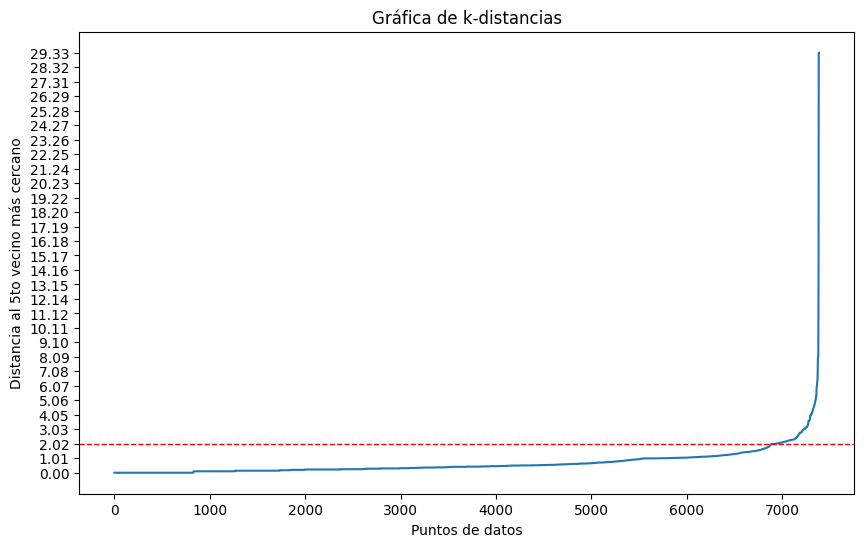

In [61]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(features)
distances, indices = neighbors_fit.kneighbors(features)

distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Gráfica de k-distancias')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia al 5to vecino más cercano')

yticks = np.linspace(0, max(distances), num=30)  # 20 marcas en el eje y
plt.yticks(yticks)
plt.axhline(y=2, color='r', linestyle='--', linewidth=1)

plt.show()

Como se puede observar en la gráfica, el punto de corte o cambio de dirección para un número de 5 vecinos cercanos distribidos en la data, es aproximadamente en el valor 2. Por lo que estas observaciones se pasan como parámetros para el modelo DBSCAN.

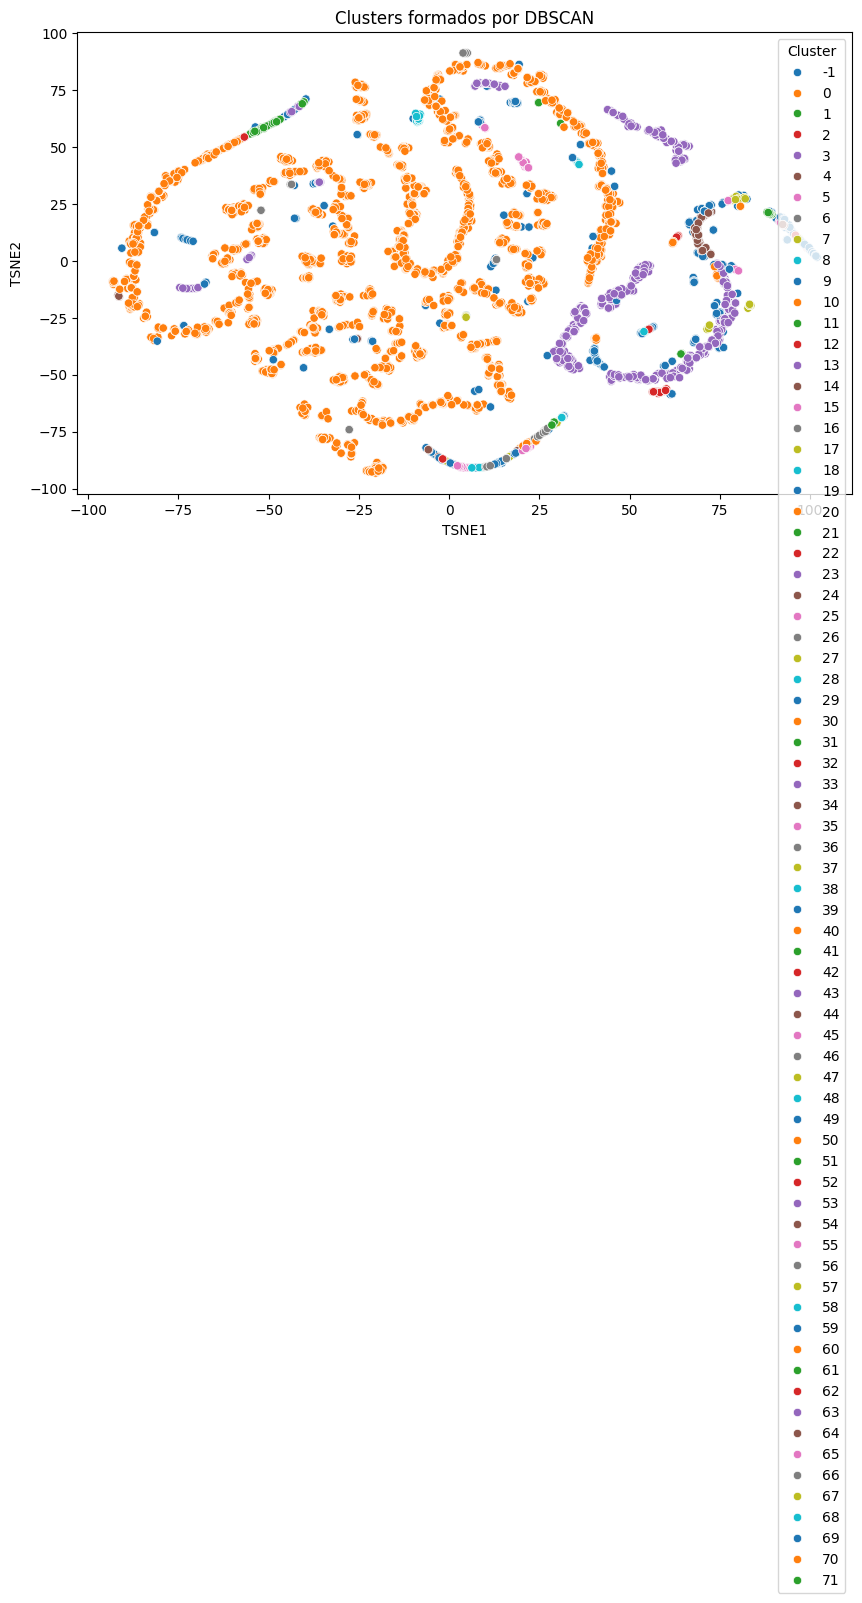

In [62]:
from sklearn.cluster import DBSCAN

# Ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
clusters = dbscan.fit_predict(features)

# Añadir los clusters al DataFrame original
df['Cluster'] = clusters

# Añadir los clusters al DataFrame de t-SNE
tsne_df['Cluster'] = clusters

# Visualizar los clusters en t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='tab10', data=tsne_df)
plt.title('Clusters formados por DBSCAN')
plt.show()

Density distribution CO2 emissions by cluster

C:\Users\emanuel.novelo\AppData\Local\Temp\ipykernel_161472\2493083992.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='CO2 Emissions(g/km)', hue='Cluster', palette='tab10', fill=True)


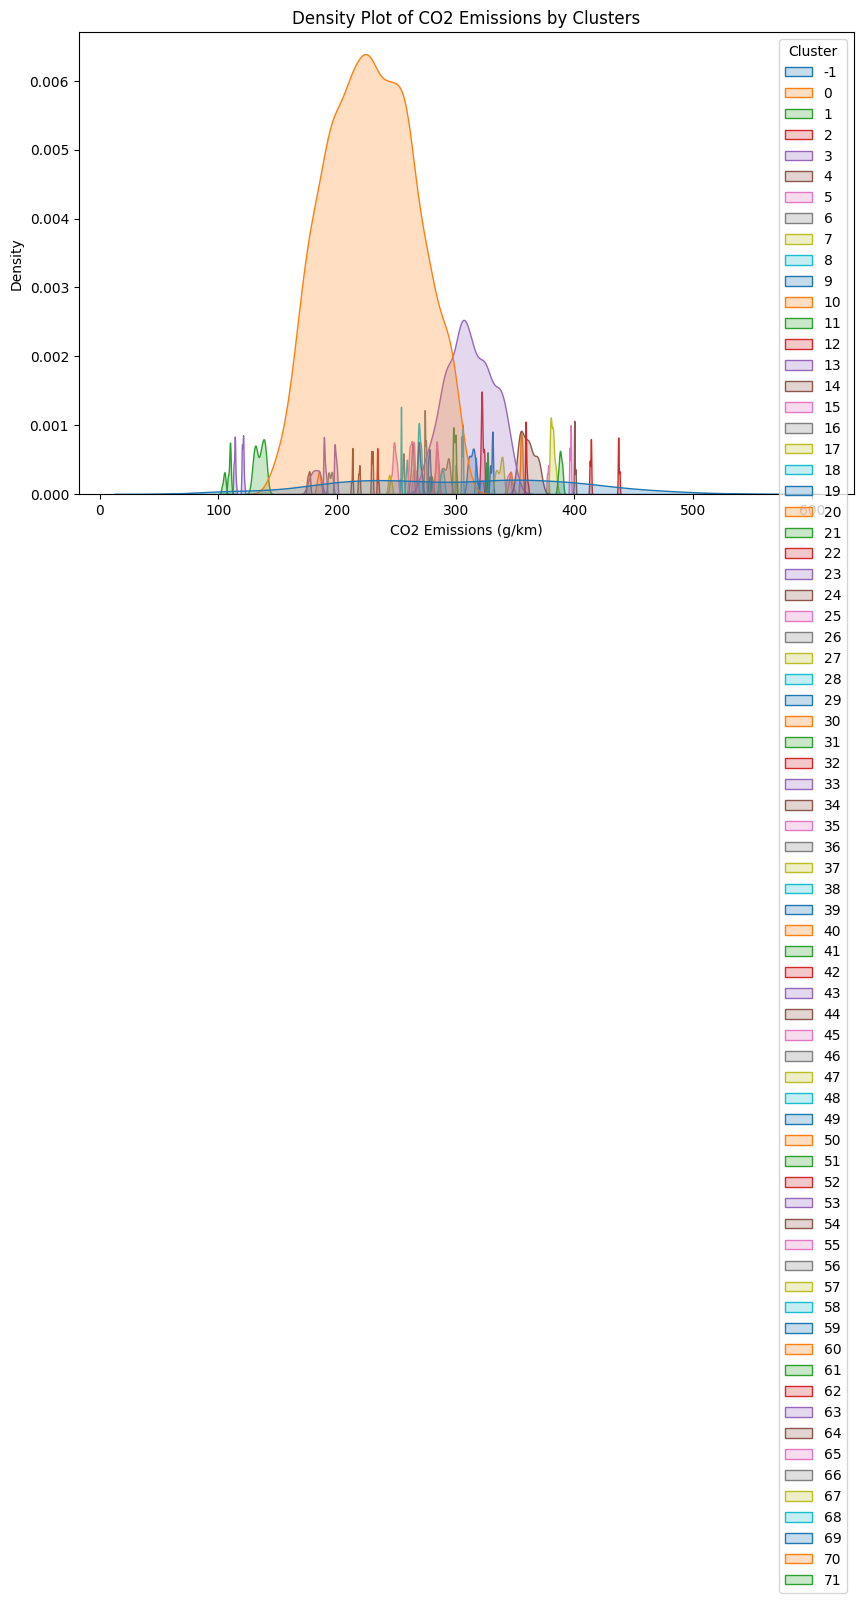

In [63]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='CO2 Emissions(g/km)', hue='Cluster', palette='tab10', fill=True)
plt.title('Density Plot of CO2 Emissions by Clusters')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Density')
plt.show()

Como forma ilustrativa se observa la densidad (clasificada por nivel de emisiones de bajo a alto) respecto las componentes de la data (obtenidas del T-SNE). Finalmente se muestra una tabla de relación entre las features y las componetnes T-SNE 1 & 2, de esta forma podemos complementar la interpretación de la gráfica sabiendo que features influyen más o menos, positiva y negativamente, a cada componente.

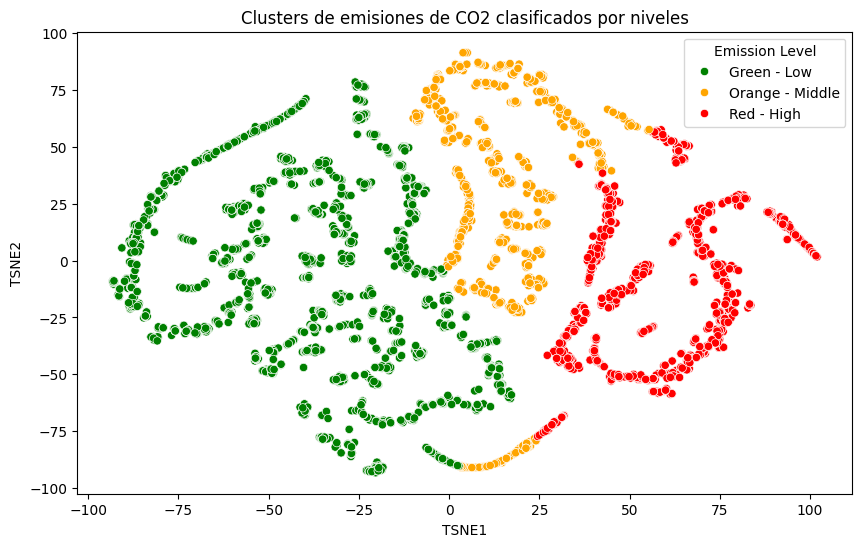

In [64]:
import numpy as np

# Clasificar las emisiones de CO2 en tres grupos usando cuantiles
quantiles = np.percentile(df['CO2 Emissions(g/km)'], [50, 75, 90])

df['Emission Level'] = pd.cut(df['CO2 Emissions(g/km)'],
                                bins=[-np.inf, quantiles[0], quantiles[1], np.inf],
                                labels=['Green - Low', 'Orange - Middle', 'Red - High'])

tsne_df['Emission Level'] = df['Emission Level']

# Visualizar los clusters en t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Emission Level', palette=['green', 'orange', 'red'], data=tsne_df)
plt.title('Clusters de emisiones de CO2 clasificados por niveles')
plt.show()

In [65]:
# Calcular la correlación entre las variables originales y las componentes t-SNE
correlations = pd.concat([features, tsne_df[['TSNE1', 'TSNE2']]], axis=1).corr()

# Mostrar las correlaciones de TSNE1 y TSNE2 con las variables originales
tsne_correlations = correlations.loc[['TSNE1', 'TSNE2'], features.columns]
tsne_correlations

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
TSNE1,0.834789,0.81222,0.861233,0.827188,0.859778,-0.854690,0.939401
TSNE2,-0.076133,-0.05065,-0.155395,-0.134140,-0.150245,0.163234,-0.023285


Se puede concluir de las correlaciones (disclaimer: no es una medida súper confiable para determinar "importancia" de las features en el cálculo de componentes de T-SNE) que para el componente 1, las variables están teniendo un mayor impacto. Por lo que se gráfica el T-SNE componente 1 vs las emisiones de CO2 para hallar relaciones.

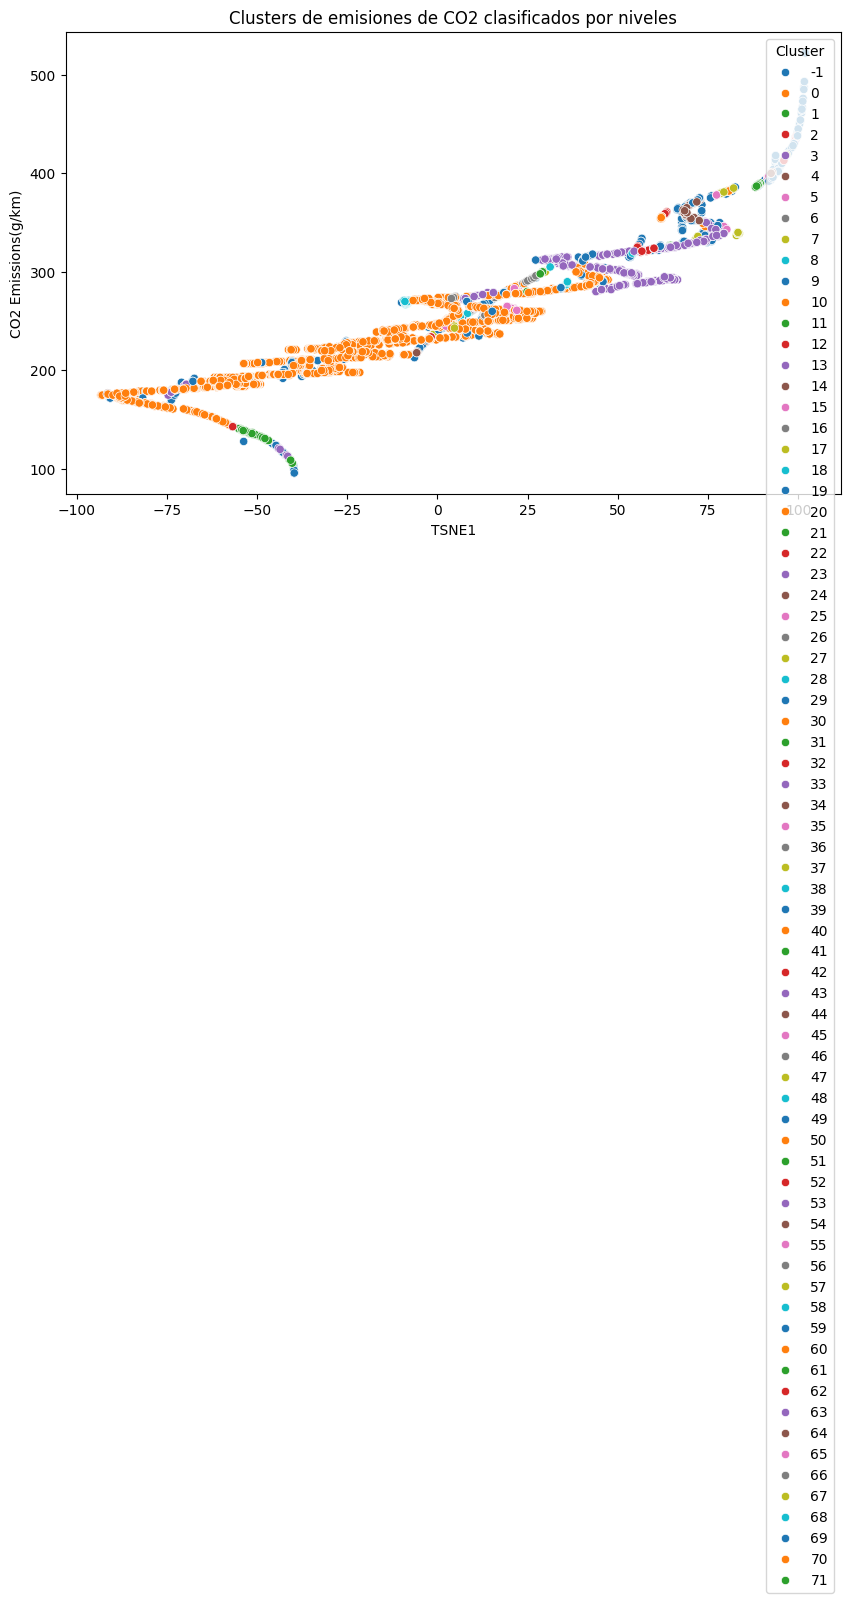

In [66]:
# Visualizar los clusters en t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='CO2 Emissions(g/km)', hue='Cluster', palette='tab10', data=tsne_df)
plt.title('Clusters de emisiones de CO2 clasificados por niveles')
plt.show()

Se crea un histograma de la frecuencia de cada cluster del DBSCAN en los datos. El cluster 0 es el más frecuente. Igualmente se identifican cerca de 500 observaciones consideradas como "ruido" por el algoritmo (cluster -1).

C:\Users\emanuel.novelo\AppData\Local\Temp\ipykernel_161472\3883861907.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


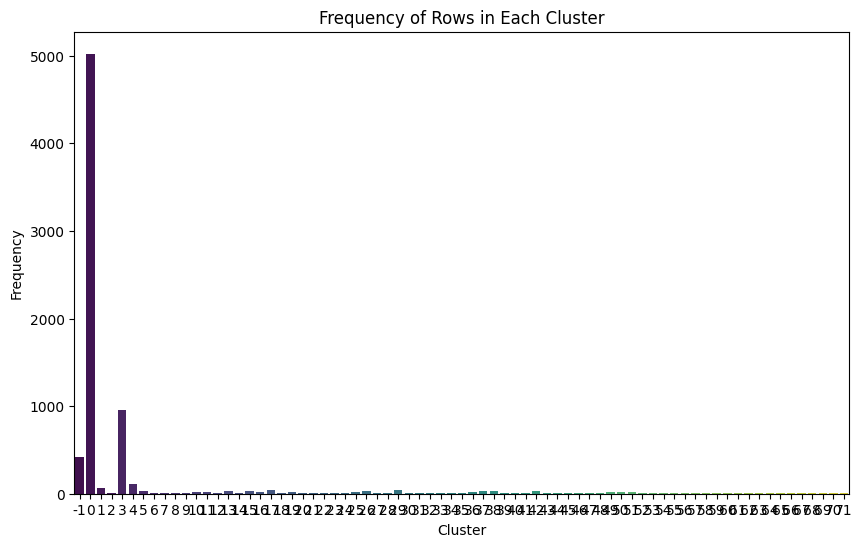

In [67]:
cluster_counts = df['Cluster'].value_counts().sort_index()

# Plot the frequency of rows in each cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Frequency of Rows in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

Se muestra un resumen de las características e insights de las variables categóricas y númericas de la data de emisiones de CO2, por cluster del DBSCAN.

In [68]:
summary = df.groupby('Cluster').agg({
    'CO2 Emissions(g/km)': ['mean', 'std'],
    'Make': lambda x: x.value_counts().idxmax(),
    'Model': lambda x: x.value_counts().idxmax(),
    'Vehicle Class': lambda x: x.value_counts().idxmax(),
    'Engine Size(L)': ['mean', 'std'],
    'Cylinders': ['mean', 'std'],
    'Transmission': lambda x: x.value_counts().idxmax(),
    'Fuel Type': lambda x: x.value_counts().idxmax(),
    'Fuel Consumption City (L/100 km)': ['mean', 'std'],
    'Fuel Consumption Hwy (L/100 km)': ['mean', 'std'],
    'Fuel Consumption Comb (L/100 km)': ['mean', 'std'],
    'Fuel Consumption Comb (mpg)': ['mean', 'std']
}).reset_index()

summary.columns = ['Cluster', 
                   'CO2 Emissions Mean', 'CO2 Emissions Std', 
                   'Most Common Make', 'Most Common Model', 'Most Common Vehicle Class', 
                   'Engine Size Mean', 'Engine Size Std', 
                   'Cylinders Mean', 'Cylinders Std', 
                   'Most Common Transmission', 'Most Common Fuel Type', 
                   'Fuel Consumption City Mean', 'Fuel Consumption City Std', 
                   'Fuel Consumption Hwy Mean', 'Fuel Consumption Hwy Std', 
                   'Fuel Consumption Comb Mean', 'Fuel Consumption Comb Std', 
                   'Fuel Consumption Comb MPG Mean', 'Fuel Consumption Comb MPG Std']

summary

,Cluster,CO2 Emissions Mean,CO2 Emissions Std,Most Common Make,Most Common Model,Most Common Vehicle Class,Engine Size Mean,Engine Size Std,Cylinders Mean,Cylinders Std,Most Common Transmission,Most Common Fuel Type,Fuel Consumption City Mean,Fuel Consumption City Std,Fuel Consumption Hwy Mean,Fuel Consumption Hwy Std,Fuel Consumption Comb Mean,Fuel Consumption Comb Std,Fuel Consumption Comb MPG Mean,Fuel Consumption Comb MPG Std
0,-1,299.502358,93.648783,FORD,FOCUS FFV,TWO-SEATER,4.162264,1.728769,7.198113,2.968455,A6,Z,16.271226,5.724219,11.387736,3.704874,14.071462,4.756994,23.257075,10.746045
1,0,228.267370,36.345936,FORD,SONIC,SUV - SMALL,2.522616,0.749912,4.785188,1.000718,AS6,X,11.138244,1.874373,8.155883,1.244043,9.795899,1.556013,29.579932,4.910056
2,1,135.045455,3.812658,TOYOTA,ES 300h,MID-SIZE,2.004545,0.370211,3.924242,0.266638,AV,X,5.710606,0.304898,5.842424,0.382727,5.778788,0.182727,48.909091,1.475203
3,2,359.363636,0.674200,ASTON MARTIN,DB9,MINICOMPACT,6.072727,0.264919,12.000000,0.000000,A6,Z,18.372727,0.374409,11.900000,0.618061,15.472727,0.190215,18.090909,0.301511
4,3,311.963312,18.889742,CHEVROLET,SILVERADO 4WD,SUV - STANDARD,5.122642,0.698200,8.000000,0.000000,AS8,Z,15.624214,0.972837,10.622222,0.886833,13.376834,0.821228,21.146751,1.380214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,67,419.000000,0.000000,MERCEDES-BENZ,G 550,SUV - STANDARD,5.220000,0.383406,8.000000,0.000000,A6,Z,20.480000,0.749667,15.220000,0.867179,18.140000,0.134164,16.000000,0.000000
69,68,322.000000,1.000000,CHEVROLET,SUBURBAN 4WD FFV,PICKUP TRUCK - STANDARD,5.240000,0.134164,8.000000,0.000000,A6,E,21.980000,0.408656,16.160000,0.614817,19.360000,0.089443,14.800000,0.447214
70,69,370.000000,0.000000,LAMBORGHINI,Huracan Coupe AWD,TWO-SEATER,5.200000,0.000000,10.000000,0.000000,AM7,Z,17.950000,0.053452,12.950000,0.053452,15.700000,0.000000,18.000000,0.000000
71,70,382.000000,0.000000,ROLLS-ROYCE,Phantom,FULL-SIZE,6.700000,0.000000,12.000000,0.000000,AS8,Z,20.000000,0.000000,11.800000,0.000000,16.300000,0.000000,17.000000,0.000000


#### **Bibliograficas**

- https://github.com/d0r1h/CO2-Emission-by-Cars?tab=readme-ov-file
- https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles
- https://www.kdnuggets.com/2019/10/right-clustering-algorithm.html
- https://www.sciencedirect.com/science/article/abs/pii/S0048969723007507
- https://www.datacamp.com/es/tutorial/introduction-t-sne
- https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf#:~:text=Sorting%20the%20results%20of%20each,(Gaonkar%20and%20Sawant%202013).
